# Preprocess RCT Abstracts

Pare them down and filter away those with no abstracts

In [106]:
df = pd.read_csv('RCT-data-for-edward.csv', index_col=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120771 entries, 0 to 120770
Data columns (total 2 columns):
label    120771 non-null int64
text     120771 non-null object
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


In [107]:
df

,label,text
0,-1,TI_Evaluation TI_new TI_titanium TI_mesh TI_ca...
1,-1,"TI_Bare TI_metal TI_stents, TI_durable TI_poly..."
2,-1,TI_Risk TI_first TI_venous TI_thromboembolism ...
3,-1,TI_Safety TI_efficacy TI_outcomes TI_first TI_...
4,-1,TI_Tamsulosin TI_treatment TI_benign TI_prosta...
5,-1,TI_The TI_role TI_vitamin TI_D TI_metabolic TI...
6,-1,TI_Heredity TI_lifestyle TI_determination TI_b...
7,-1,TI_Smaller TI_grey TI_matter TI_volumes TI_ant...
8,-1,TI_Addison's TI_disease: TI_A TI_survey TI_633...
9,-1,TI_Genetic TI_variation TI_IGF1 TI_locus TI_as...


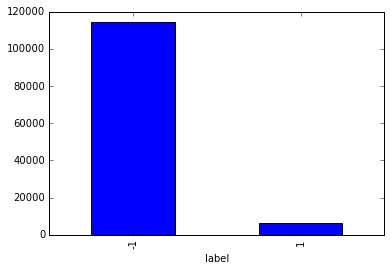

In [108]:
df.groupby('label').size().plot(kind='bar')

### Take Small Subset

In [109]:
small_df = df.ix[:500-1]

small_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 2 columns):
label    500 non-null int64
text     500 non-null object
dtypes: int64(1), object(1)
memory usage: 11.7+ KB


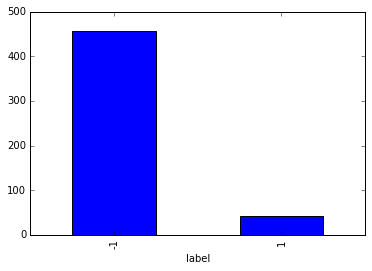

In [110]:
small_df.groupby('label').size().plot(kind='bar')

### Filter Away Abstracts with No Body

In [111]:
small_df['body'] = small_df.text.map(lambda abstract: ' '.join(word for word in abstract.split() if not word.startswith('TI_')))

small_df = small_df[small_df.body.map(lambda body: len(body)) >= 100]

len(small_df)

/export/home/u14/ebanner/.anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


473

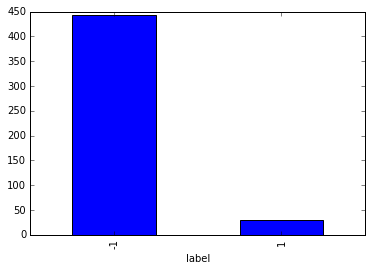

In [112]:
small_df.groupby('label').size().plot(kind='bar')

### Tokenize Abstracts

In [113]:
from tokenizer import Tokenizer

tk = Tokenizer(small_df.text)

tk.maxlen

418

### Check It

In [114]:
tk.test(abstract_idx=0)

TI_Evaluation TI_new TI_titanium TI_mesh TI_cage TI_versus TI_traditional TI_titanium TI_mesh TI_cage TI_single-level, TI_anterior TI_cervical TI_corpectomy TI_fusion. Study design: A retrospective review of prospectively collected data in an academic institution. Objective: To evaluate the safety and efficacy of a new type of titanium mesh cage (TMC) in single-level, anterior cervical corpectomy and fusion (ACCF). Methods: Fifty-eight patients consecutive with cervical spondylotic myelopathy (CSM) from cervical degenerative spondylosis and isolated ossification of the posterior longitudinal ligament were treated with a single-level ACCF using either a new type of TMC (28 patients, group A) or the traditional TMC (30 patients, group B). We evaluated the patients for TMC subsidence, cervical lordosis (C2-C7 Cobb and Cobb of fused segments) and fusion status for a minimum of 30 months postoperatively based on spine radiographs. In addition, neurologic outcomes were evaluated using the Ja

### Create and Pickle Embeddings

In [140]:
import gensim

word_vectors = 'PubMed-w2v.bin' # 'GoogleNews-vectors-negative300.bin'

wv_loc = '/export/home/u14/ebanner/Downloads/{}'.format(word_vectors)

model = gensim.models.Word2Vec.load_word2vec_format(wv_loc, binary=True)  # C binary format

tk.build_embeddings(model)

tk.do_pickle('rct_embeddings.p')

### Fix Labels

In [167]:
labels_bdf.rct.cat.categories

Int64Index([0, 1], dtype='int64')

### Pickle Labels

In [180]:
labels_df = small_df[['label']]
labels_bdf = small_df[['label_fixed']]

labels_df.columns = labels_bdf.columns = ['rct']

labels_df['dummy'] = labels_bdf['dummy'] = 1 # need at least *two* columns in a dataframe!

labels_df.rct = labels_df.rct.astype('category')
labels_bdf.rct = labels_bdf.rct.astype('category')

import pickle

pickle.dump(labels_df, open('rct_labels.p', 'wb'))
pickle.dump(labels_bdf, open('rct_binarized.p', 'wb'))

/export/home/u14/ebanner/.anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
